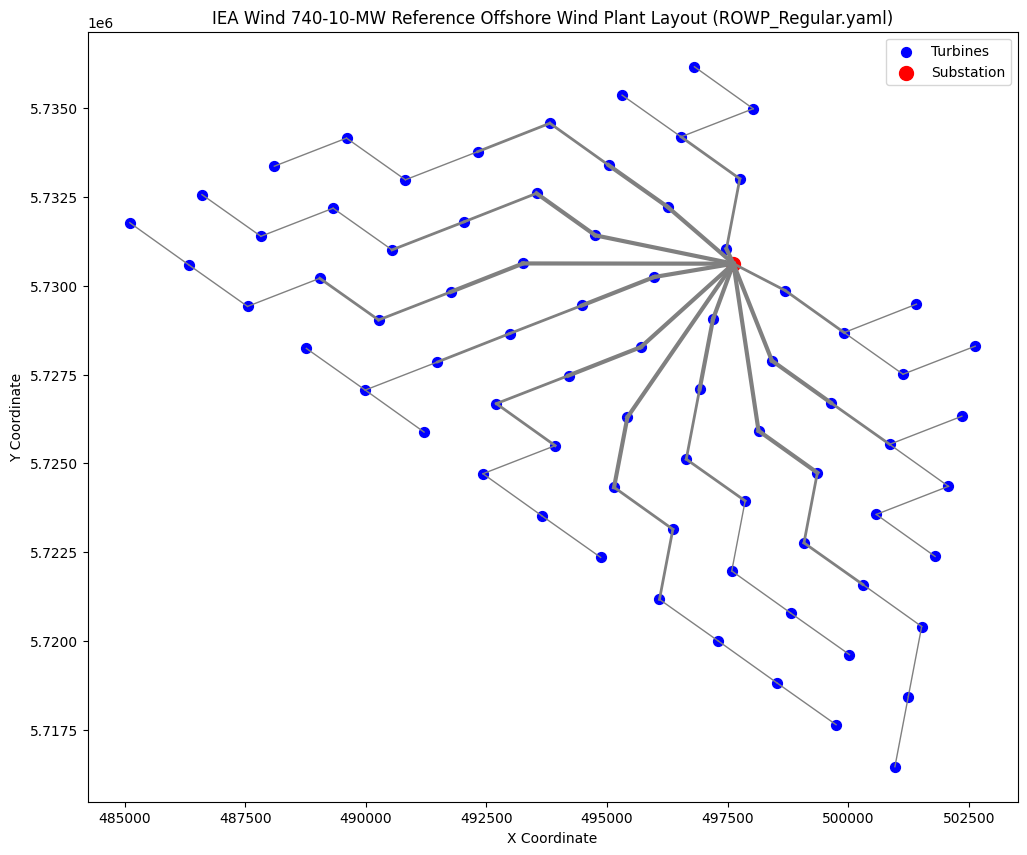

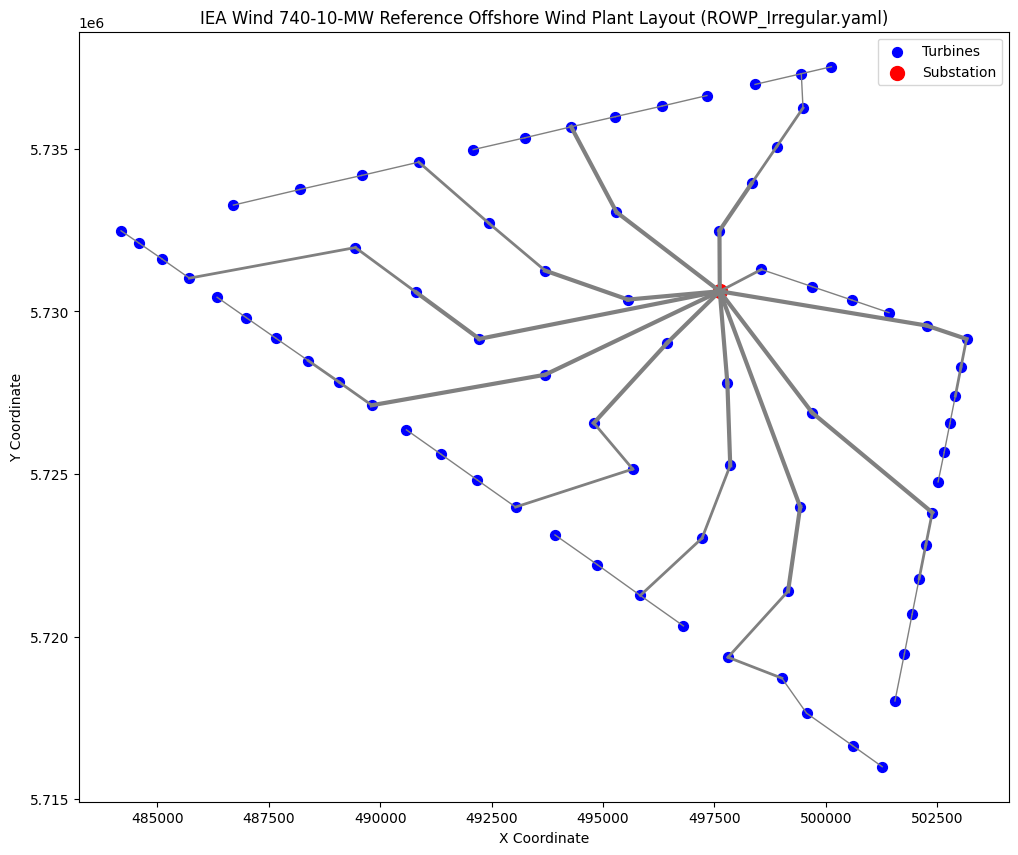

In [11]:
import yaml
import matplotlib.pyplot as plt

# Function to remove lines containing specific tags
def preprocess_yaml_content(yaml_content, tag_to_remove='!include'):
    return "\n".join(line for line in yaml_content.splitlines() if tag_to_remove not in line)

# List of file names to process
file_names = ['ROWP_Regular.yaml', 'ROWP_Irregular.yaml']

for file_name in file_names:
    # Load and preprocess the YAML data
    with open(file_name, 'r') as file:
        raw_yaml_content = file.read()
        clean_yaml_content = preprocess_yaml_content(raw_yaml_content)

    data = yaml.safe_load(clean_yaml_content)

    # Extract coordinates
    turbine_x = data['layouts']['coordinates']['x']
    turbine_y = data['layouts']['coordinates']['y']
    substation_x = data['electrical_substations']['coordinates']['x']
    substation_y = data['electrical_substations']['coordinates']['y']
    edges = data['electrical_collection_array']['edges']
    cable_types = data['electrical_collection_array']['cables']['cable_type']

    # Plot the wind farm layout
    plt.figure(figsize=(12, 10))

    # Plot turbines
    plt.scatter(turbine_x, turbine_y, color='blue', label='Turbines', s=50)

    # Plot substation
    plt.scatter(substation_x, substation_y, color='red', label='Substation', s=100)

    # Plot electrical collection array edges with varying thickness based on cable type
    for edge in edges:
        thickness = edge[2] + 1
        if edge[1] == -1:
            x_values = [turbine_x[edge[0]], substation_x[0]]
            y_values = [turbine_y[edge[0]], substation_y[0]]
        else:
            x_values = [turbine_x[edge[0]], turbine_x[edge[1]]]
            y_values = [turbine_y[edge[0]], turbine_y[edge[1]]]
        plt.plot(x_values, y_values, color='gray', linewidth=thickness)

    # Add labels and legend
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'IEA Wind 740-10-MW Reference Offshore Wind Plant Layout ({file_name})')
    plt.legend()

# Show plot
plt.show()
